In [47]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [48]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
# dropping the 'Loan_ID' column as it contains irrelevant nominal data.
df.drop(columns=['Loan_ID'],inplace=True)          

In [50]:
# checking for null values.
df.isnull().sum()

# Some columns have null values.

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
# Filling the null values with mode or mean.
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [52]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
# checking for duplicate values.
df.duplicated().value_counts()

# didn't find any.

False    614
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [55]:
df['Dependents'].unique()        # the data is in string format.

array(['0', '1', '2', '3+'], dtype=object)

In [56]:
# replacing the string formated data with numerics.
df['Dependents']= df['Dependents'].replace('3+',3)
df['Dependents']= df['Dependents'].replace('0',0)
df['Dependents']= df['Dependents'].replace('1',1)
df['Dependents']= df['Dependents'].replace('2',2)

In [57]:
df['Dependents'].dtype

dtype('int64')

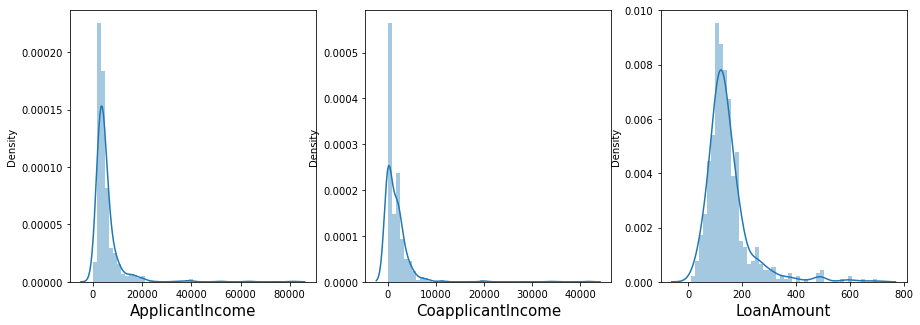

In [58]:
# let's see the distribution plot of the continuous-data columns that we have.
cont_features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
plt.figure(figsize=(15,5))
plotnumber=1
for column in cont_features:
    if plotnumber<=6:
        ax= plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

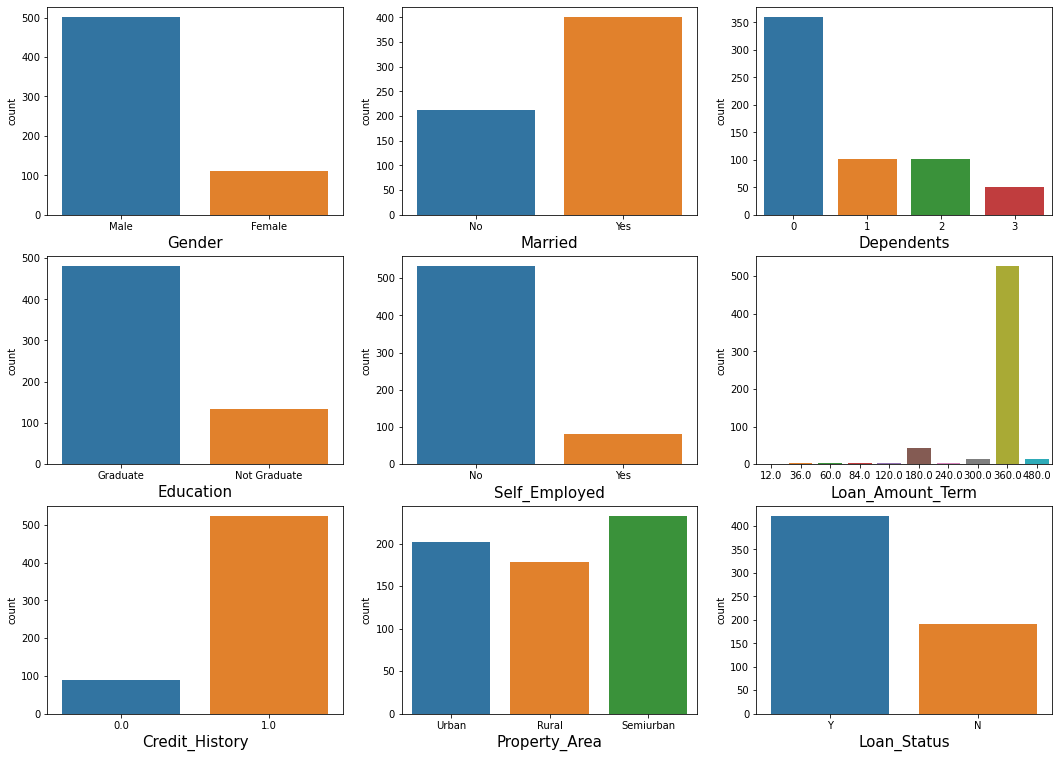

In [59]:
# let's see the count plot of the categorical-data columns that we have.
cat_features=df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
plt.figure(figsize=(18,13))
plotnumber=1
for column in cat_features:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Most of the people applying for loan are male.
# Most of the people applying for loan are married.
# Most of the people applying for loan have 0 dependents.
# Most of the people applying for loan are graduate.
# Most of the people applying for loan are not self-employed.
# Most of the people applying for loan have better credit history.

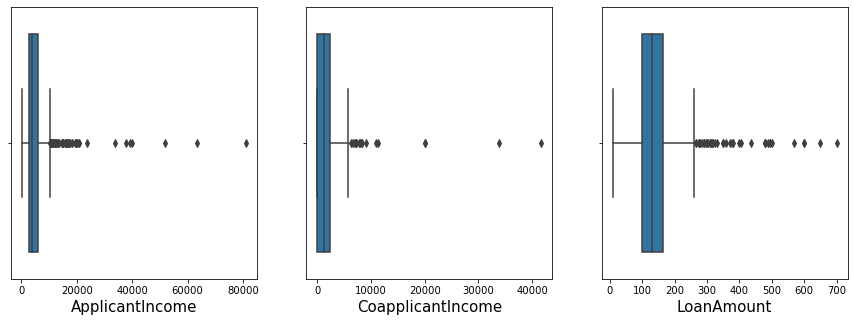

In [60]:
# Let's see the boxplot of the continuous data columns.
plt.figure(figsize=(15,5))
plotnumber=1
for column in cont_features:
    if plotnumber<=6:
        ax= plt.subplot(1,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# there are some outliers.

In [61]:
# Removing outliers using z-score.
from scipy.stats import zscore
z_score= zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_zscore= np.abs(z_score)
filtering_entry= (abs_zscore<3).all(axis=1)
df=df[filtering_entry]
df.shape

(589, 12)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             589 non-null    object 
 1   Married            589 non-null    object 
 2   Dependents         589 non-null    int64  
 3   Education          589 non-null    object 
 4   Self_Employed      589 non-null    object 
 5   ApplicantIncome    589 non-null    int64  
 6   CoapplicantIncome  589 non-null    float64
 7   LoanAmount         589 non-null    float64
 8   Loan_Amount_Term   589 non-null    float64
 9   Credit_History     589 non-null    float64
 10  Property_Area      589 non-null    object 
 11  Loan_Status        589 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 59.8+ KB


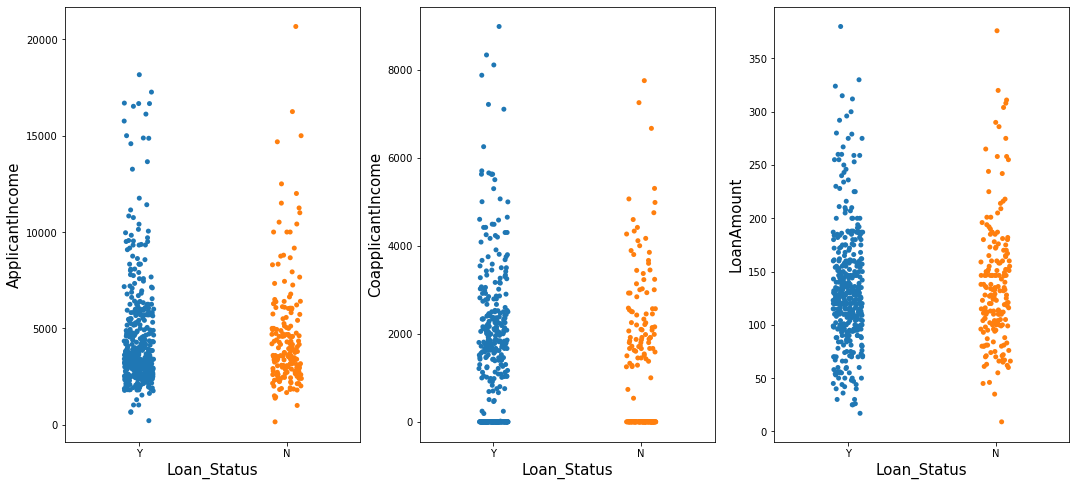

In [63]:
# Let's see the stripplot of continuous data columns with Loan_Status.
plt.figure(figsize=(18,8))
for i in enumerate(cont_features):
    plt.subplot(1,3,i[0]+1)
    sns.stripplot(x='Loan_Status',y=i[1],data=df)
    plt.ylabel(i[1],fontsize=15)
    plt.xlabel('Loan_Status',fontsize=15)

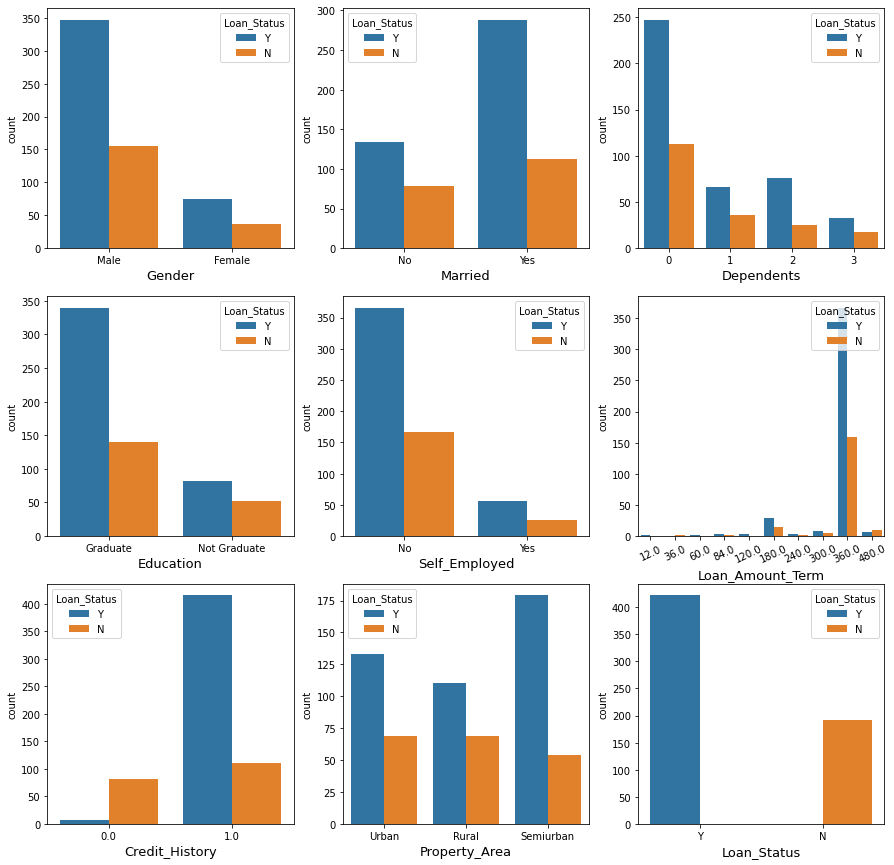

In [64]:
# Let's see the countplot of categorical data columns with color coding of Loan_Status.
plt.figure(figsize=(15,15))
for i in enumerate(cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1],hue='Loan_Status',data=cat_features)
    plt.xlabel(i[1],fontsize=13)
    if i[1]=='Loan_Amount_Term':
        plt.xticks(rotation=25)
    else:
        pass
    
# People with bad credit history have very less success in getting loan approved.

In [65]:
# Encoding the object datatype categorical columns using Label Encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

def label_encode(column):
    df[column]= enc.fit_transform(df[[column]])

df_enc=df[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]
for i in df_enc:
    label_encode(i)
    
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<AxesSubplot:>

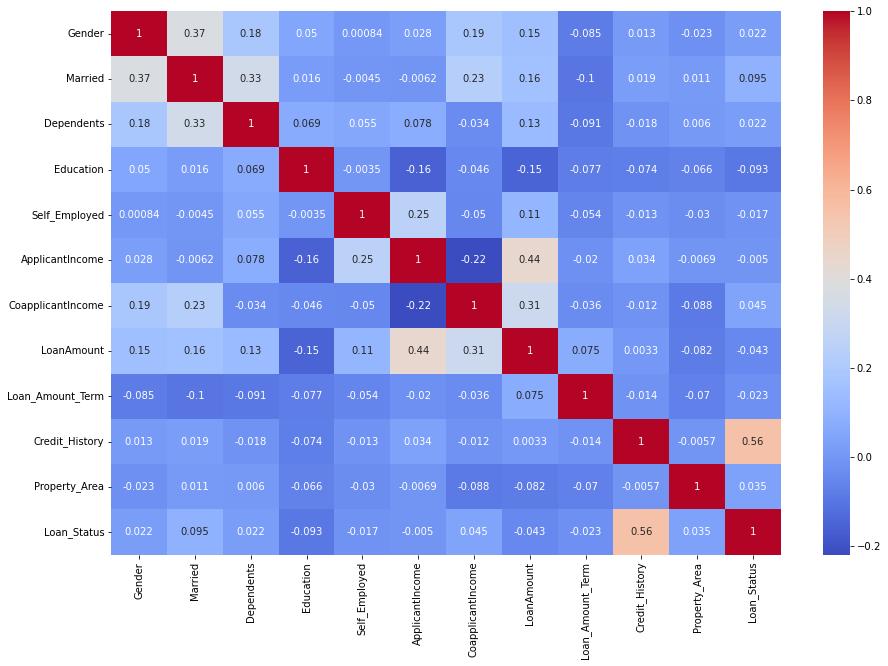

In [66]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# No multicollinearity issues can be seen.

In [67]:
# Let's see the correlation of 'Loan_Status' with other variables.
np.abs(corr["Loan_Status"]).sort_values(ascending= False)

# Apart from 'Credit_History' the relation with other variables seems to be weak.

Loan_Status          1.000000
Credit_History       0.555908
Married              0.095124
Education            0.092852
CoapplicantIncome    0.044815
LoanAmount           0.042738
Property_Area        0.034894
Loan_Amount_Term     0.023119
Gender               0.021942
Dependents           0.021937
Self_Employed        0.016617
ApplicantIncome      0.005043
Name: Loan_Status, dtype: float64

In [68]:
df.drop(columns=['Loan_Amount_Term'], inplace=True)    # dropping the column with very weak relation with target variable.

In [69]:
# Checking skewness in the continuous data columns.
df[['CoapplicantIncome','LoanAmount','ApplicantIncome']].skew()

CoapplicantIncome    1.353191
LoanAmount           1.076221
ApplicantIncome      2.164762
dtype: float64

In [70]:
# Using power transformer to reduce skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

df['CoapplicantIncome']= pt.fit_transform(df[['CoapplicantIncome']])
df['LoanAmount']= pt.fit_transform(df[['LoanAmount']])
df['ApplicantIncome']= pt.fit_transform(df[['ApplicantIncome']])

df[['CoapplicantIncome','LoanAmount','ApplicantIncome']].skew()

CoapplicantIncome   -0.186195
LoanAmount           0.060143
ApplicantIncome      0.028063
dtype: float64

In [71]:
# Separating the features and label.
X= df.drop(columns=['Loan_Status'])
y= df['Loan_Status']

In [72]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [73]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen as all values are under acceptable level.

        vif           Features
0  1.212186             Gender
1  1.404804            Married
2  1.171777         Dependents
3  1.059947          Education
4  1.053645      Self_Employed
5  1.750066    ApplicantIncome
6  1.590366  CoapplicantIncome
7  1.539505         LoanAmount
8  1.008638     Credit_History
9  1.021712      Property_Area


In [111]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
   
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 81.41
Testing Score for sample 0 : 82.43


Training Score for sample 1 : 80.95
Testing Score for sample 1 : 83.78


Training Score for sample 2 : 81.18
Testing Score for sample 2 : 83.11


Training Score for sample 3 : 81.63
Testing Score for sample 3 : 81.76


Training Score for sample 4 : 81.86
Testing Score for sample 4 : 82.43


Training Score for sample 5 : 82.54
Testing Score for sample 5 : 77.7


Training Score for sample 6 : 81.63
Testing Score for sample 6 : 81.76


Training Score for sample 7 : 82.31
Testing Score for sample 7 : 79.73


Training Score for sample 8 : 82.54
Testing Score for sample 8 : 79.05


Training Score for sample 9 : 81.18
Testing Score for sample 9 : 83.11




In [112]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)

    rf.fit(x_train, y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")
    

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 78.38


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 79.73


Training Score for sample 2 : 100.0
Testing Score for sample 2 : 83.78


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 79.73


Training Score for sample 4 : 100.0
Testing Score for sample 4 : 77.03


Training Score for sample 5 : 100.0
Testing Score for sample 5 : 76.35


Training Score for sample 6 : 100.0
Testing Score for sample 6 : 81.08


Training Score for sample 7 : 100.0
Testing Score for sample 7 : 79.73


Training Score for sample 8 : 100.0
Testing Score for sample 8 : 79.05


Training Score for sample 9 : 100.0
Testing Score for sample 9 : 79.05




In [113]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 81.41
Testing Score for sample 0 : 79.73


Training Score for sample 1 : 80.95
Testing Score for sample 1 : 79.73


Training Score for sample 2 : 80.73
Testing Score for sample 2 : 83.78


Training Score for sample 3 : 82.77
Testing Score for sample 3 : 79.73


Training Score for sample 4 : 82.31
Testing Score for sample 4 : 78.38


Training Score for sample 5 : 84.13
Testing Score for sample 5 : 77.03


Training Score for sample 6 : 82.31
Testing Score for sample 6 : 79.05


Training Score for sample 7 : 82.77
Testing Score for sample 7 : 79.05


Training Score for sample 8 : 81.18
Testing Score for sample 8 : 77.03


Training Score for sample 9 : 82.09
Testing Score for sample 9 : 78.38




In [114]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 81.86
Testing Score for sample 0 : 81.76


Training Score for sample 1 : 81.63
Testing Score for sample 1 : 83.78


Training Score for sample 2 : 81.41
Testing Score for sample 2 : 83.11


Training Score for sample 3 : 82.54
Testing Score for sample 3 : 81.76


Training Score for sample 4 : 81.86
Testing Score for sample 4 : 83.11


Training Score for sample 5 : 83.22
Testing Score for sample 5 : 77.7


Training Score for sample 6 : 82.31
Testing Score for sample 6 : 82.43


Training Score for sample 7 : 82.31
Testing Score for sample 7 : 79.73


Training Score for sample 8 : 82.77
Testing Score for sample 8 : 79.05


Training Score for sample 9 : 82.54
Testing Score for sample 9 : 83.11




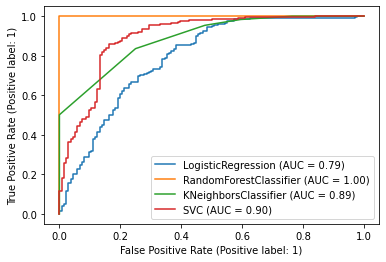

In [115]:
# plotting the roc-auc curves for training data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=9)

disp_train= plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rf,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(knn,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(svc,x_train,y_train, ax=disp_train.ax_)
plt.show()

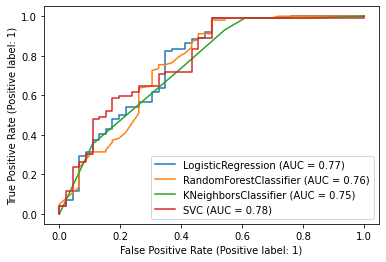

In [116]:
# plotting the roc-auc curves for testing data.

disp_test= plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rf,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(knn,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(svc,x_test,y_test, ax=disp_test.ax_)
plt.show()

In [117]:
# Cross validating the Logistic Regression model.
for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 81.67
the cv score for 6 fold: 81.49
the cv score for 7 fold: 81.66
the cv score for 8 fold: 81.51
the cv score for 9 fold: 81.68


In [118]:
# Cross validating the Random Forests model.
for i in range(5,10):
    cv_score= cross_val_score(rf,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 79.97
the cv score for 6 fold: 80.14
the cv score for 7 fold: 80.3
the cv score for 8 fold: 80.31
the cv score for 9 fold: 79.97


In [119]:
# Cross validating the KNN model.
for i in range(5,10):
    cv_score= cross_val_score(knn,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 78.44
the cv score for 6 fold: 78.61
the cv score for 7 fold: 78.95
the cv score for 8 fold: 79.29
the cv score for 9 fold: 79.47


In [120]:
# Cross validating the SVC model.
for i in range(5,10):
    cv_score= cross_val_score(svc,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 81.67
the cv score for 6 fold: 81.66
the cv score for 7 fold: 81.66
the cv score for 8 fold: 81.68
the cv score for 9 fold: 81.68


In [ ]:
# Based on AUC-ROC curves and cross validation score SVC is performing best on our dataset.
# Let's try to tune it further.

In [135]:
# Hyperparamater tuning of SVC Model.
params= {"C": [1,3,5,10] ,
         "gamma": [0.01,0.1,1] ,
         "kernel":["rbf","poly","sigmoid"]
        }
grd_svc= GridSearchCV(svc, param_grid=params,cv=5)
grd_svc.fit(x_train,y_train)
print("Best Parameters:",grd_svc.best_params_)

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [136]:
# Taking the best sample split and using the tuned model on it.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1,stratify=y)
svc_tuned = grd_svc.best_estimator_
svc_tuned.fit(x_train, y_train)
    
y_pred_train = svc_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= svc_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(svc_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Training Score: 80.95
Testing Score: 83.78 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

           0       0.96      0.50      0.66        46
           1       0.81      0.99      0.89       102

    accuracy                           0.84       148
   macro avg       0.89      0.75      0.78       148
weighted avg       0.86      0.84      0.82       148

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[ 23  23]
 [  1 101]] 

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 81.67
the cv score for 6 fold: 81.66
the cv score for 7 fold: 81.66
the cv score for 8 fold: 81.68
the cv score for 9 fold: 81.68


In [140]:
# saving the model using pickle
import pickle 

Loan_Status= "Loan_Status_model.pickle"
pickle.dump(svc_tuned, open(Loan_Status,'wb'))